In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
toyota = pd.read_csv("C:/Users/Tejal/Downloads/ToyotaCorolla.csv",encoding='latin')

In [3]:
car = toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
car


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
car.corr()   #Correlation


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [6]:
car.describe()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


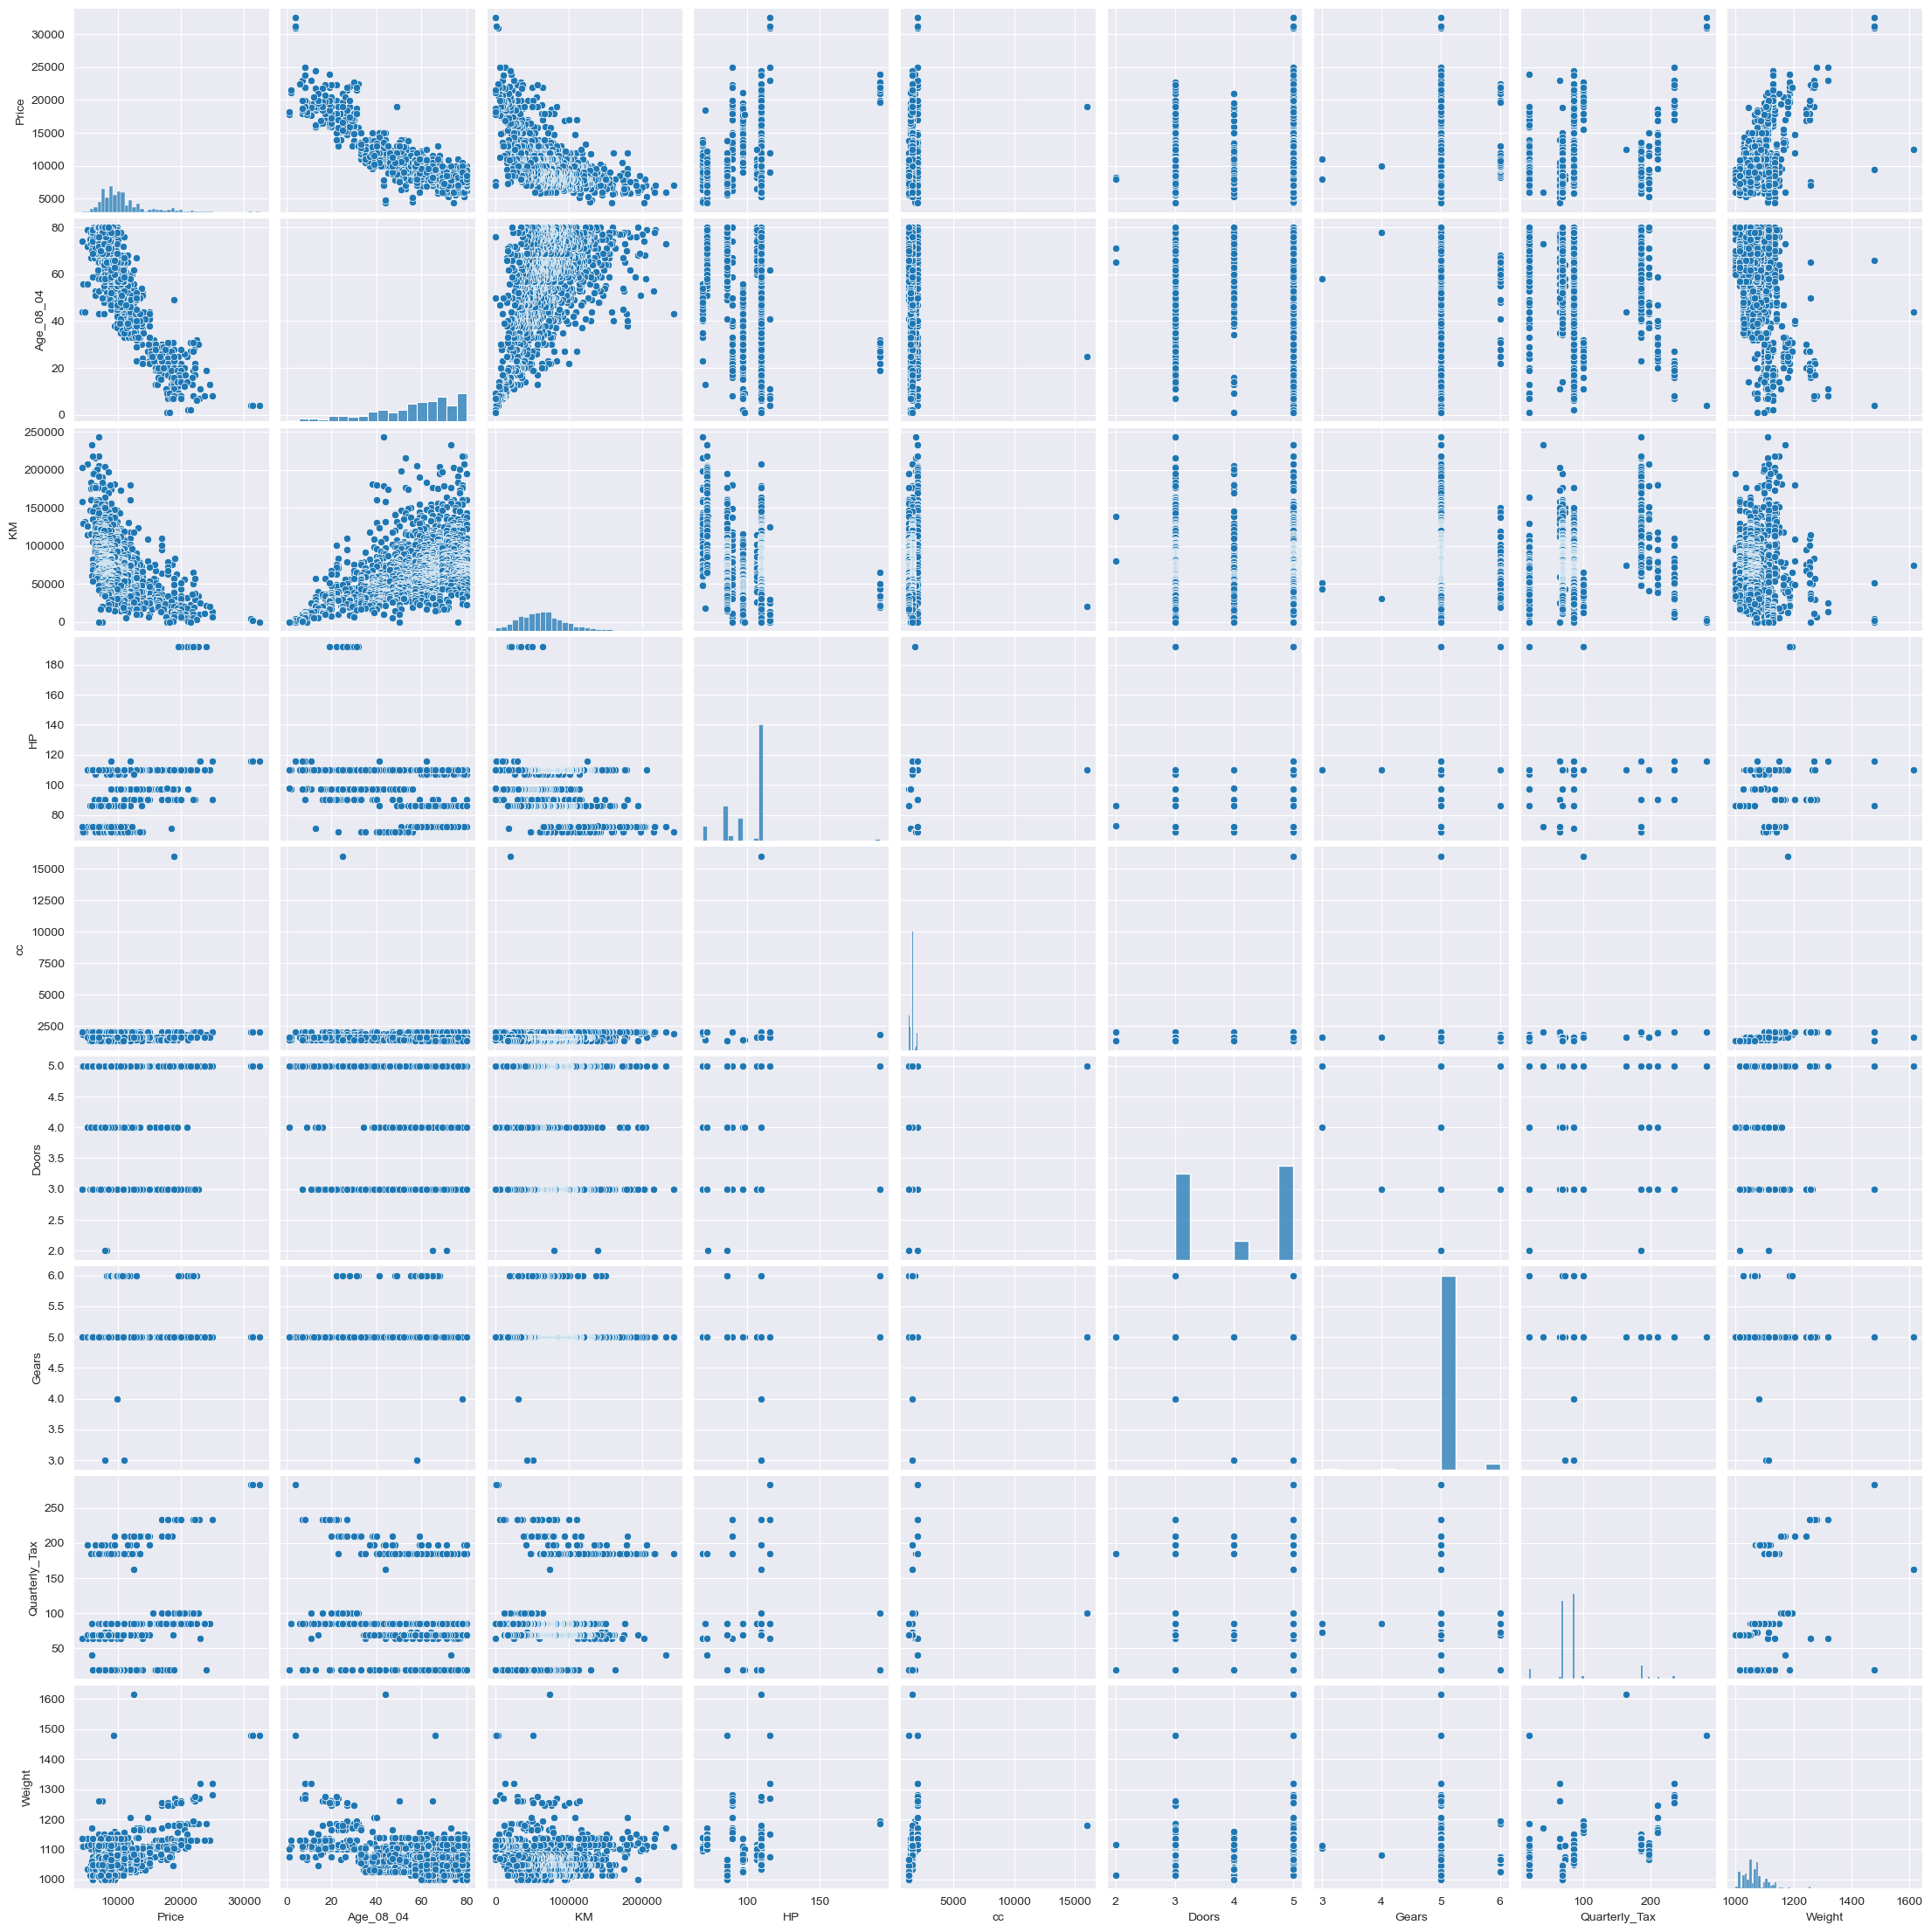

In [7]:
sns.set_style(style='darkgrid')  #Pair plot
sns.pairplot(car)


<Axes: >

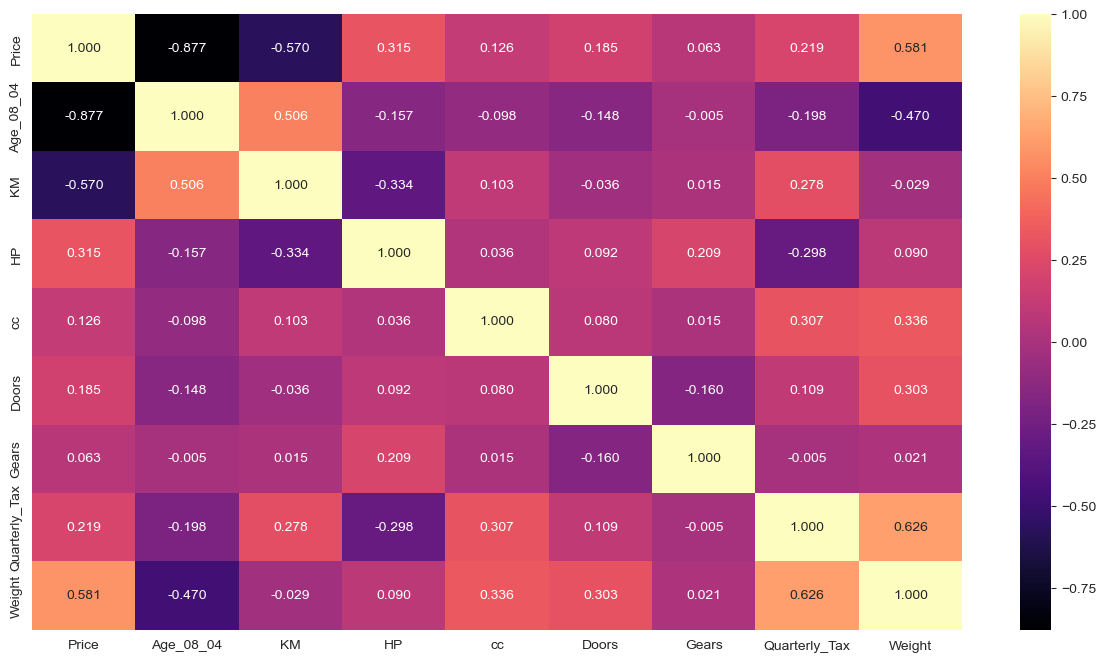

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(car.corr(), cmap='magma', annot=True, fmt=".3f")   #Heatmap fmt=".no. of decimals" 


<Axes: xlabel='Price', ylabel='HP'>

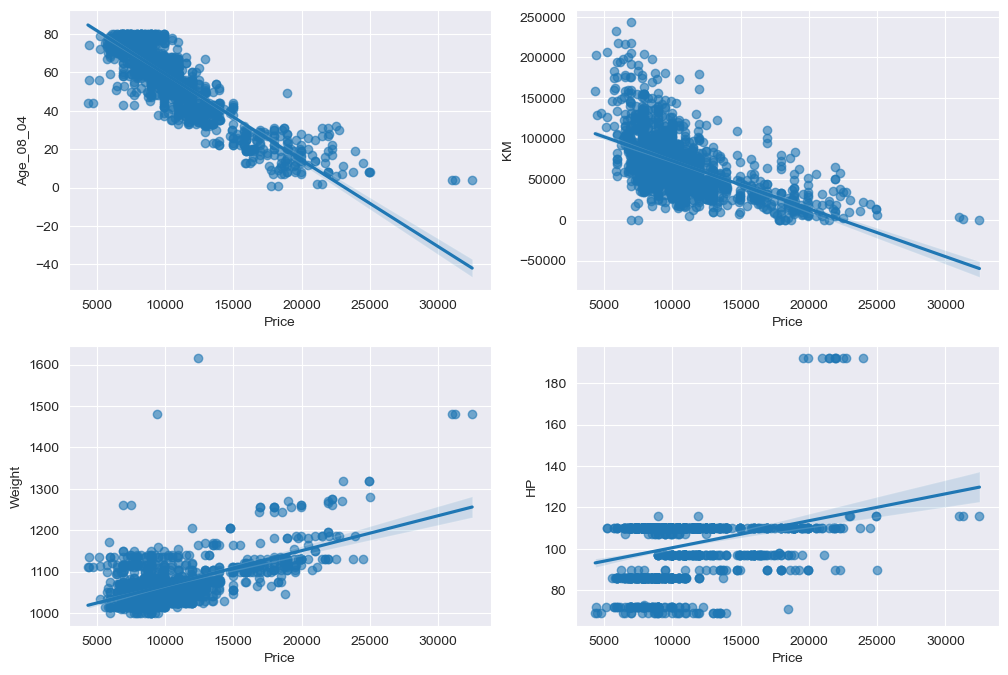

In [9]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Price', y = 'Age_08_04', data = car, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Price', y = 'KM', data = car, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Price', y = 'Weight', data = car, scatter_kws={'alpha':0.6}, ax = axes[1,0])
sns.regplot(x = 'Price', y = 'HP', data = car, scatter_kws={'alpha':0.6}, ax = axes[1,1])


In [10]:
### model building using SKLEARN

In [11]:
x = car.iloc[:,1:9]

In [12]:
x

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [13]:
y = car.iloc[:,0]

In [14]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.25,random_state = 42)

In [17]:
print("Shape of X_train: ",xtrain.shape)
print("Shape of X_test: ",xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test:",ytest.shape)


Shape of X_train:  (1077, 8)
Shape of X_test:  (359, 8)
Shape of y_train:  (1077,)
Shape of y_test: (359,)


In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
lr = LinearRegression()

In [20]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [22]:
### predicting cross_val_score the Test set results

In [23]:
cv_lr = cross_val_score(estimator = lr, X = xtrain ,  y = ytrain, cv = 10)

In [29]:
cv_lr.mean()

0.7719638138218408

In [24]:
### PREDICTING R2 sCORE the train set results

In [25]:
y_pred_lr_train = lr.predict(xtrain)

In [26]:
y_pred_lr_train

array([ 6513.449012  , 14075.81108364, 18009.98536284, ...,
        7983.28324965,  8539.58954464,  6538.18697508])

In [33]:
r2_score_lr_train = r2_score(ytrain,y_pred_lr_train)

In [34]:
r2_score_lr_train

0.8640307618150082

In [31]:
### Predicting r2 score the test set result

In [32]:
y_pred_linear_test = lr.predict(xtest)

In [37]:
r2_score_linear_train = r2_score(ytest,y_pred_linear_test)

In [38]:
r2_score_linear_train

0.8614722799605136

In [39]:
### predicting RMSE the testset results

In [41]:
rmse_linear = (np.sqrt(mean_squared_error(ytest,y_pred_linear_test)))

In [44]:
print('RMSE:',rmse_linear)

RMSE: 1402.0810748973888


In [45]:
lr.rank_

8

In [46]:
lr.coef_

array([-1.21320641e+02, -2.01353093e-02,  2.95093022e+01, -7.75554068e-02,
        2.06641923e+01,  5.83104153e+02,  1.83035074e+00,  1.78505581e+01])

In [50]:
lr.intercept_

-6263.0117206752875

In [51]:
#### price prediction

In [62]:
car_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Quarterly_Tax":200,"Weight":1200 },index=[1]) 
lr.predict(car_new)
print("The price will be:",lr.predict(car_new))


The price will be: [16029.16408435]



### Using OLS method


In [69]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = car).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:50:47   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### calculating vif

In [74]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared
vif_age = 1/(1-rsq_age)
print("vif_age:",vif_age)

vif_age: 1.8846198056602868


In [79]:
rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared
vif_km = 1/(1-rsq_km)
print("vif_km:",vif_km)

vif_km: 1.7569047782042884


In [80]:
rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared
vif_hp = 1/(1-rsq_hp)
print("vif_hp:",vif_hp)

vif_hp: 1.419422108631097


In [82]:
rsq_cc = smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared
vif_cc = 1/(1-rsq_cc)
print("vif_cc:",vif_cc)

vif_cc: 1.1638939849423793


In [86]:
rsq_doors = smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=car).fit().rsquared
vif_door = 1/(1-rsq_doors)
print("vif_cc:",vif_cc)

vif_cc: 1.1638939849423793


In [89]:
rsq_gears = smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=car).fit().rsquared
vif_gears = 1/(1-rsq_gears)
print("vif_gears:",vif_gears)

vif_gears: 1.098723019347037


In [90]:
rsq_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=car).fit().rsquared  
vif_tax = 1/(1-rsq_tax) 
print('vif_tax:',vif_tax)

vif_tax: 2.311430811531037


In [91]:
rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=car).fit().rsquared  
vif_weight = 1/(1-rsq_weight) #  2.52
print('vif_weight',vif_weight)

vif_weight 2.516419837445868


In [93]:
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_door,vif_gears,vif_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Age,1.884620
1,KM,1.163894
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


####Residual Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

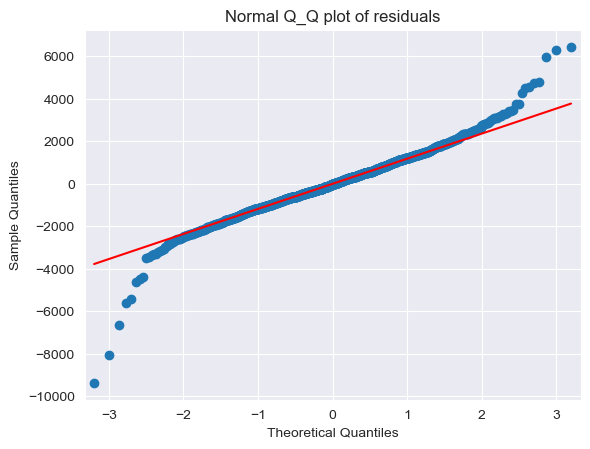

In [96]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title('Normal Q_Q plot of residuals')
plt.show

###residual plot for homoscedasticity

In [97]:
def a ( vals ):
    return(vals-vals.mean())/vals.std()

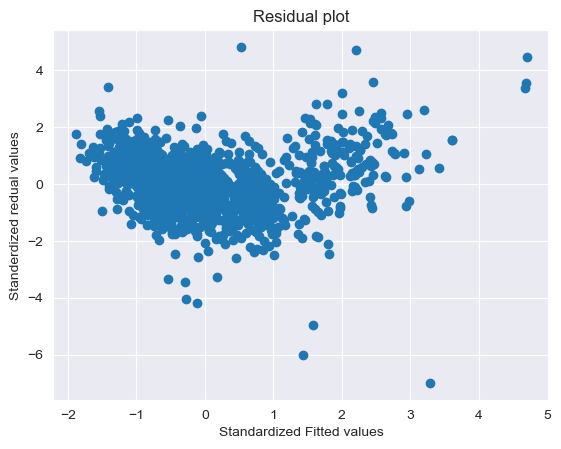

In [99]:
plt.scatter(a(model.fittedvalues),a(model.resid))
plt.title("Residual plot")
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standerdized redual values')
plt.show()

####Residual vs regressors

eval_env: 1


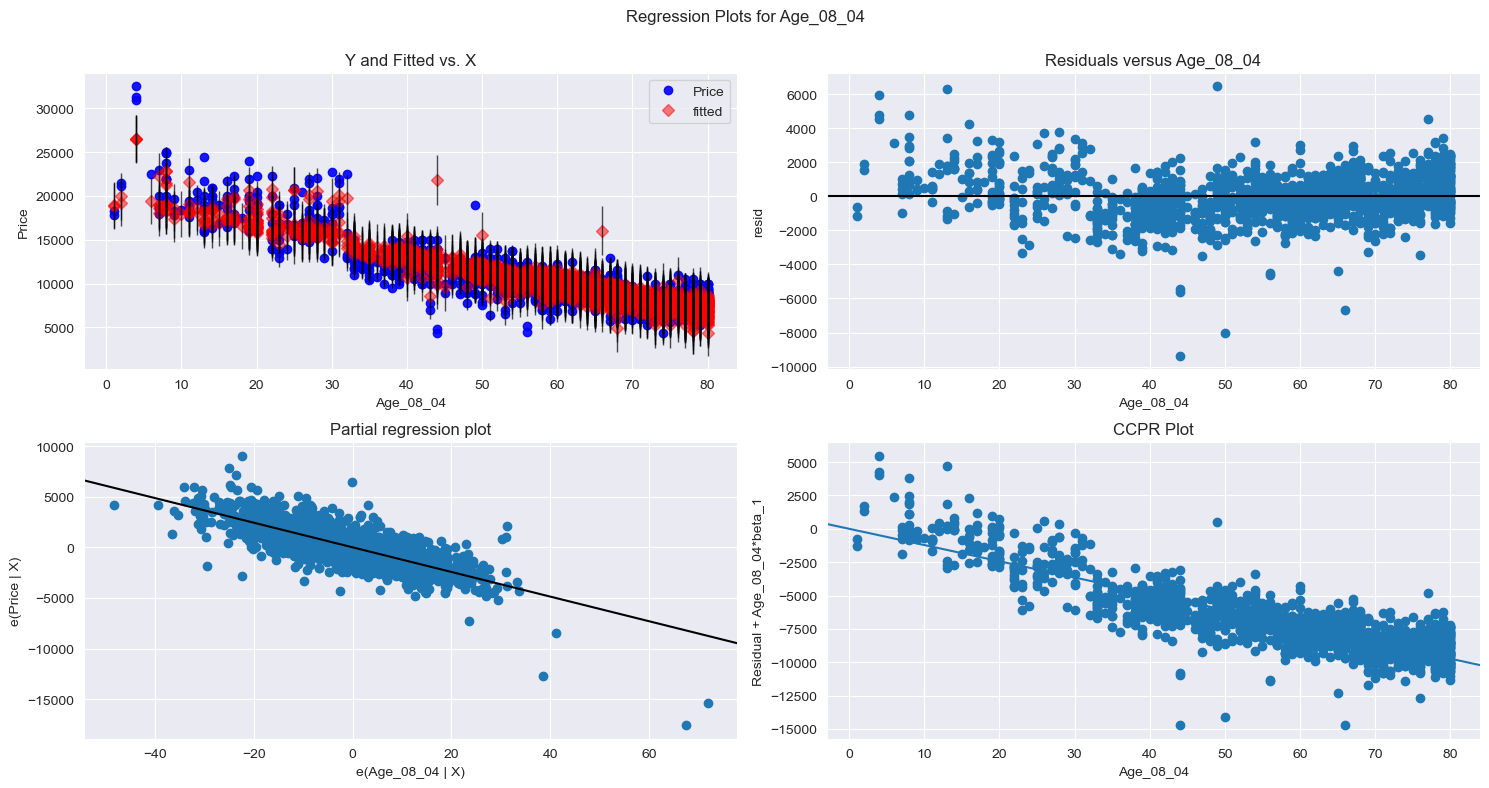

In [100]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig)
plt.show()

eval_env: 1


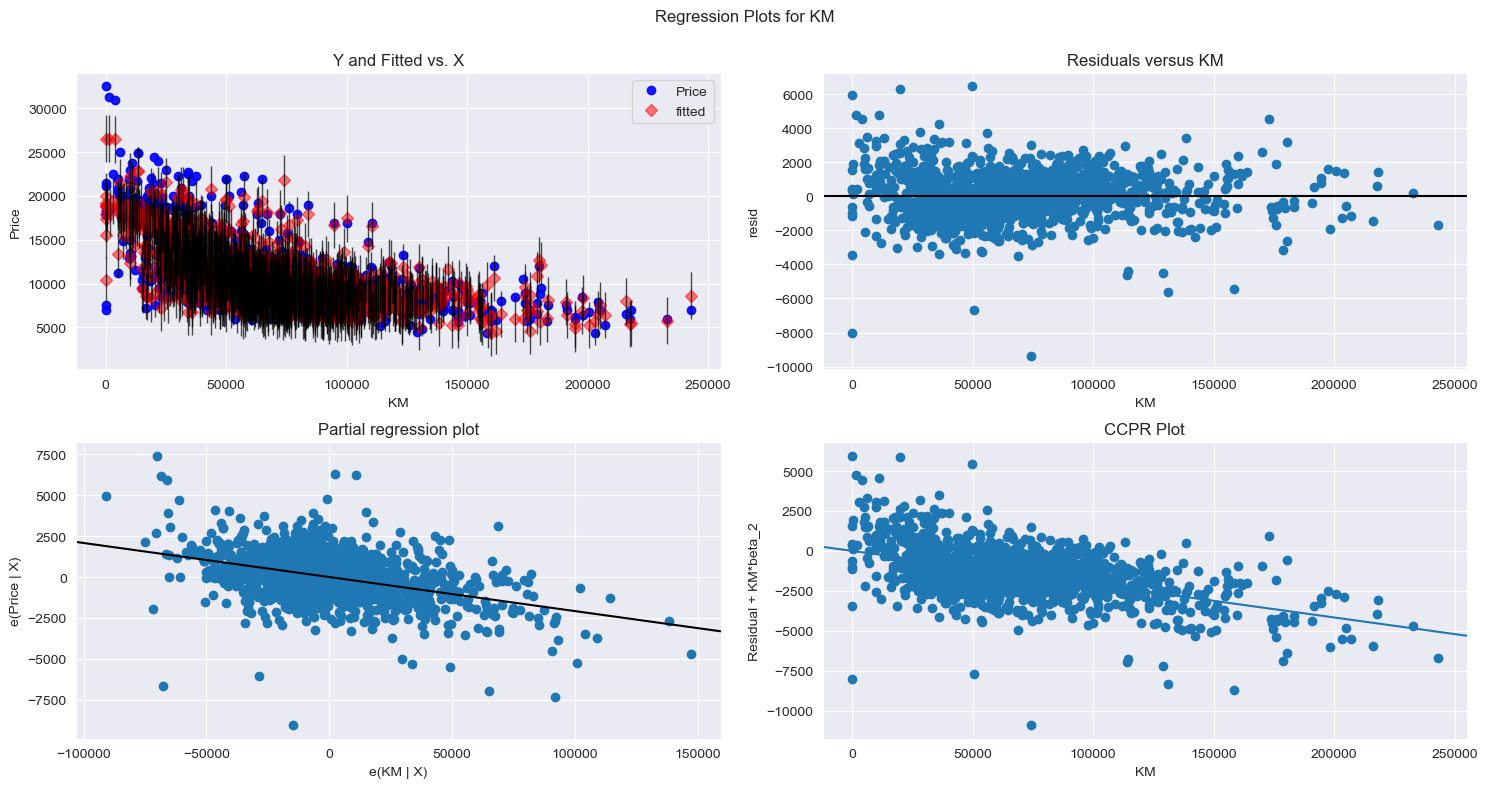

In [104]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


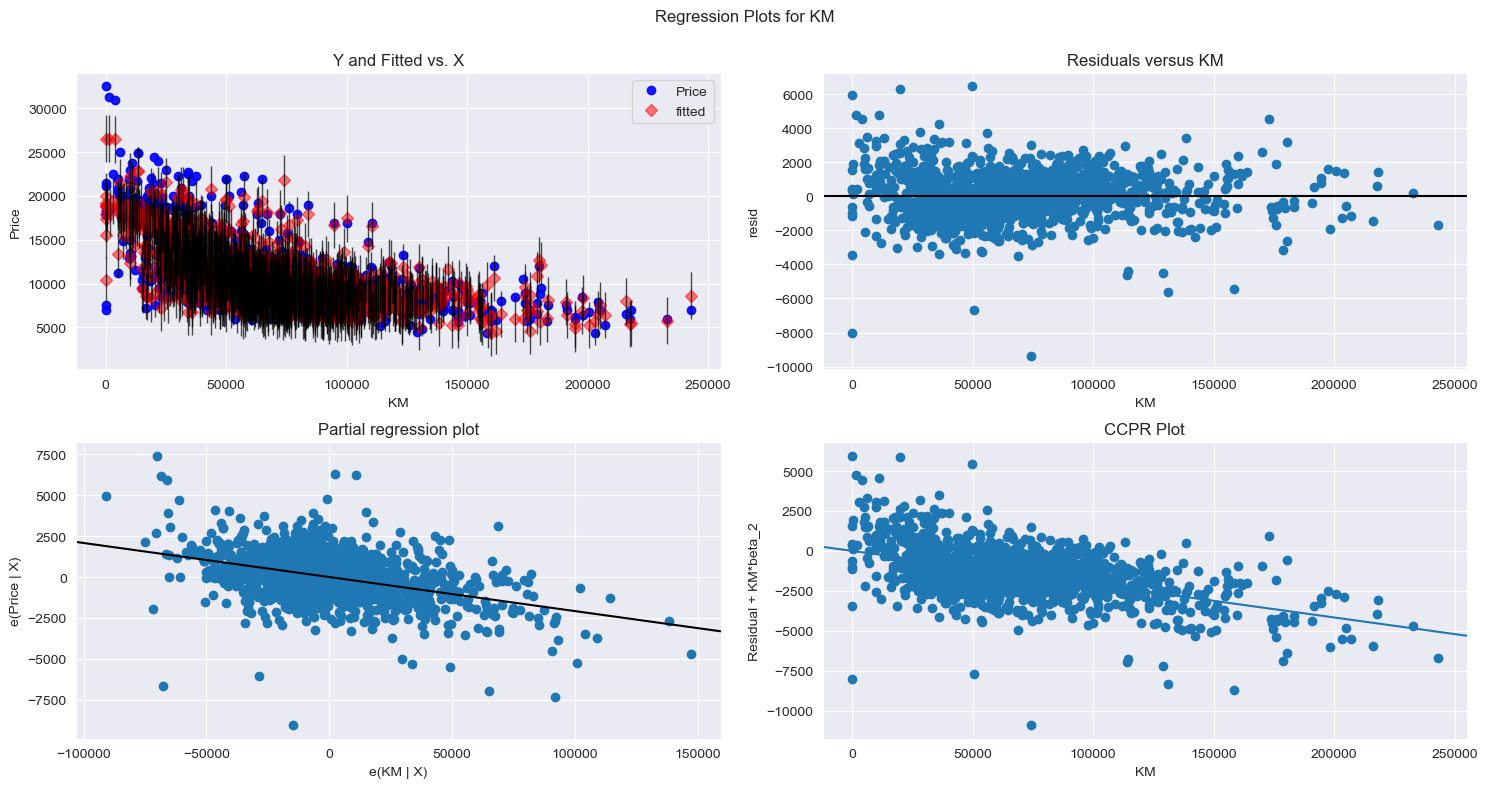

In [105]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig = fig)
plt.show()

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

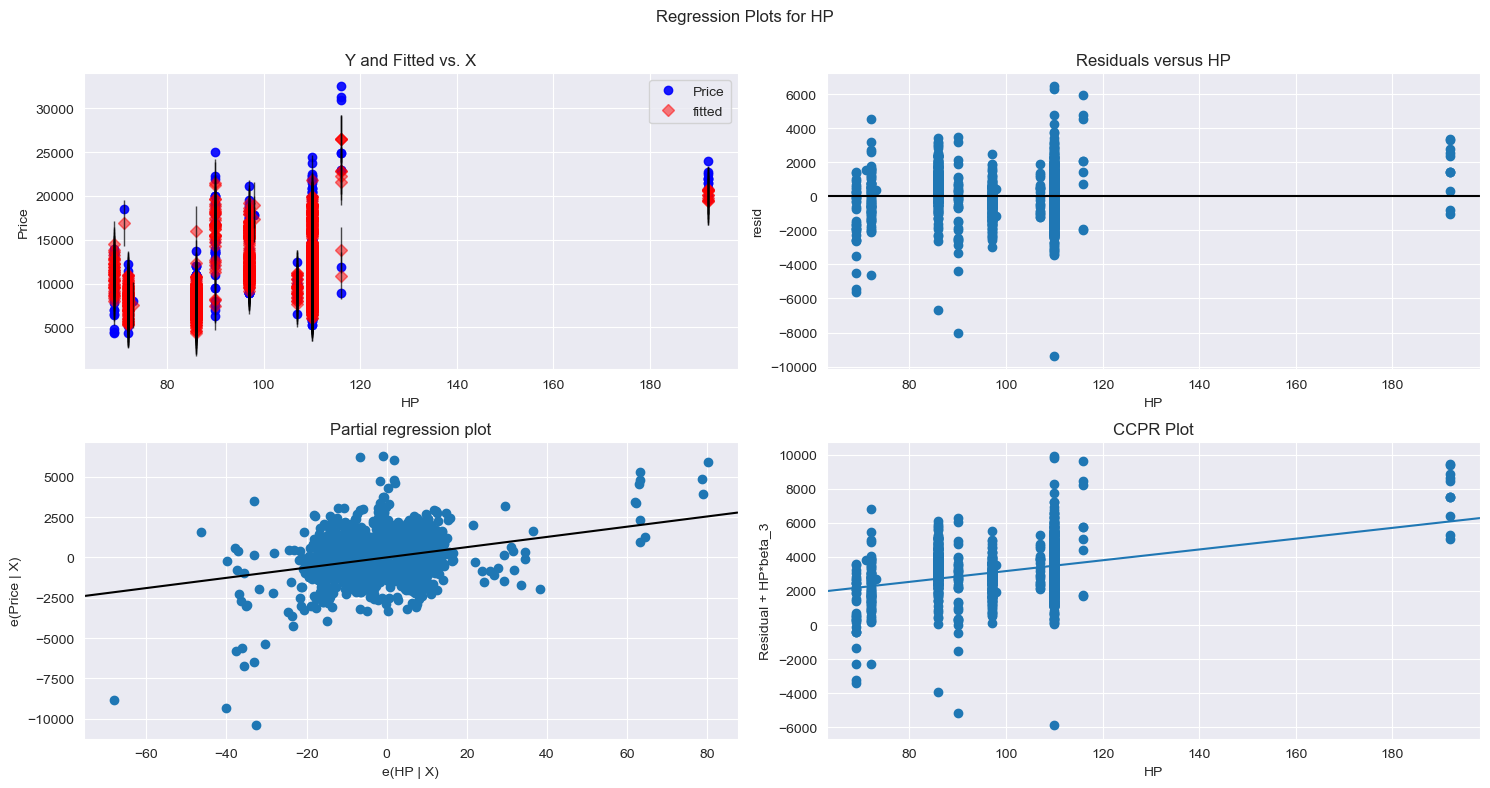

In [110]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP" , fig=fig)
plt.show

eval_env: 1


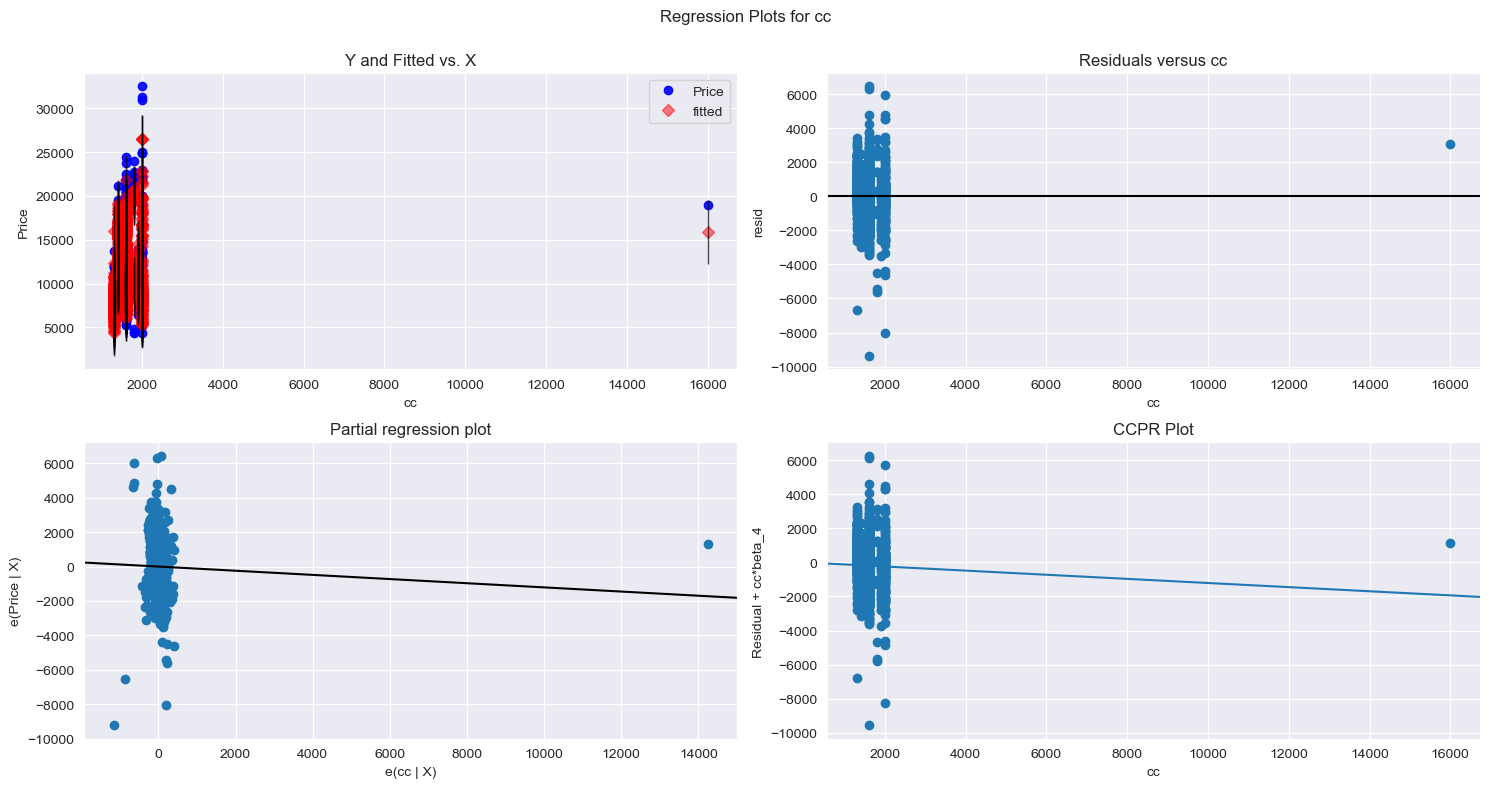

In [112]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc",fig = fig)
plt.show()

eval_env: 1


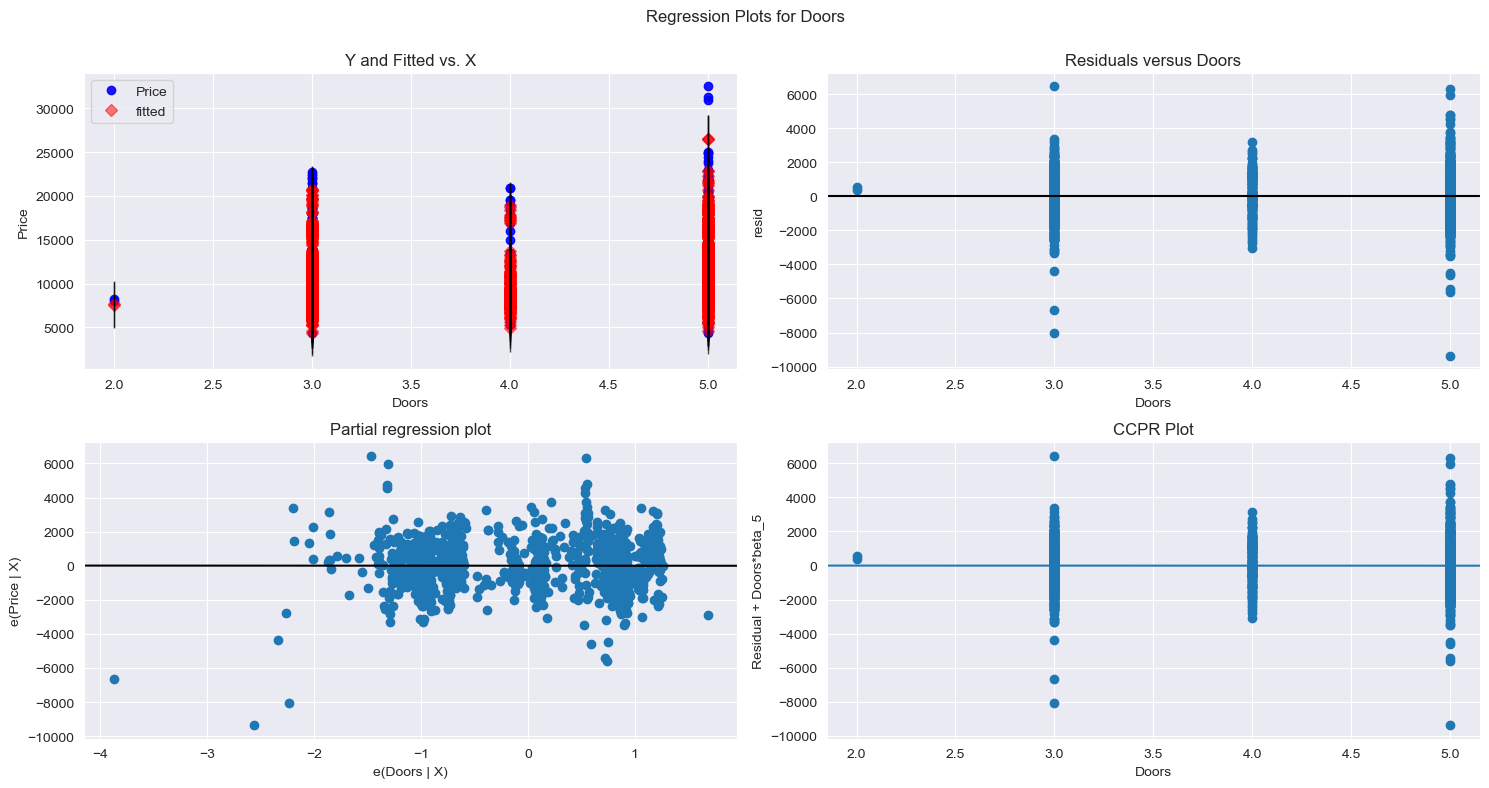

In [114]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors' , fig = fig)
plt.show()

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

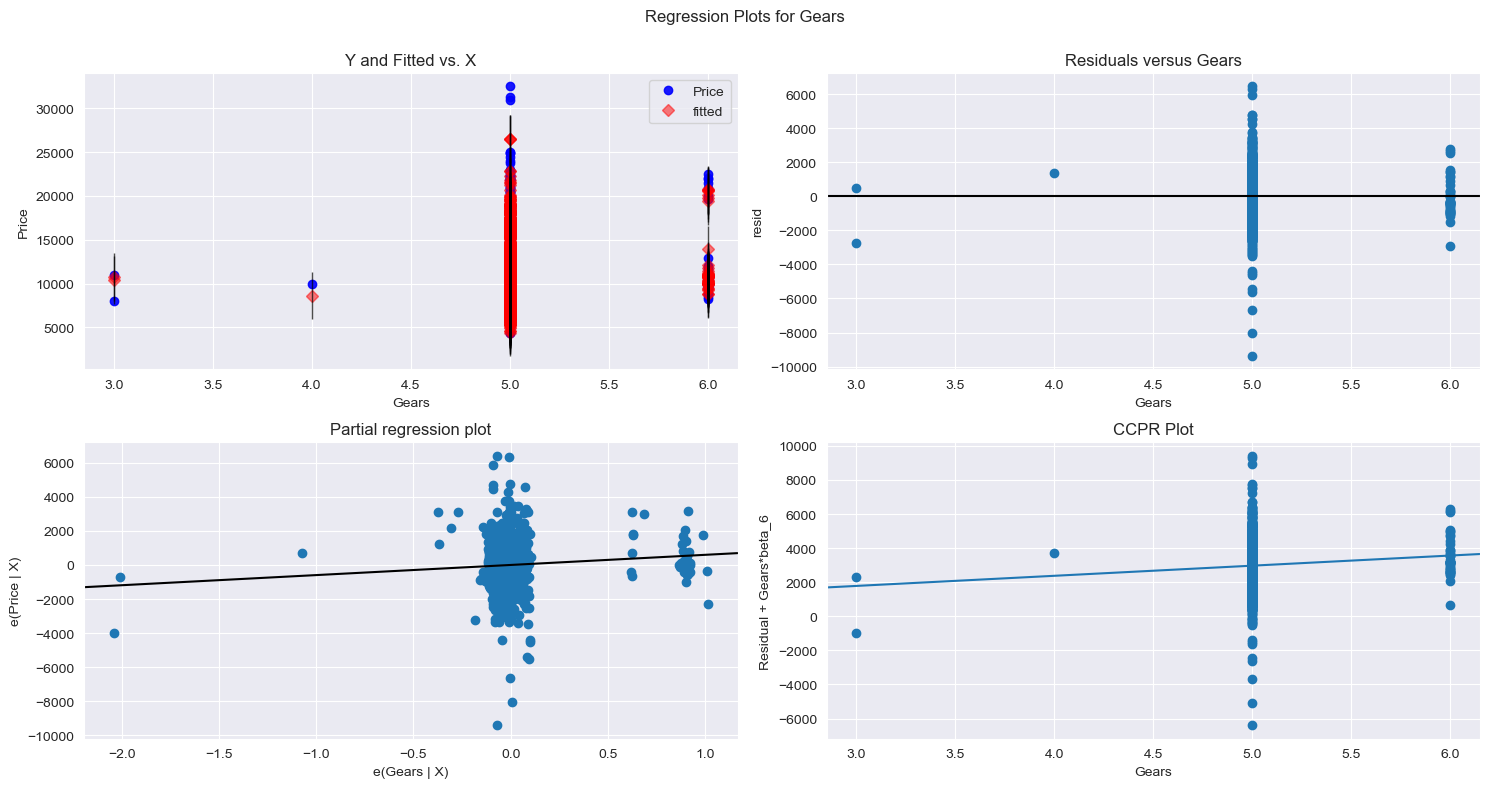

In [115]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model , "Gears", fig = fig)
plt.show

eval_env: 1


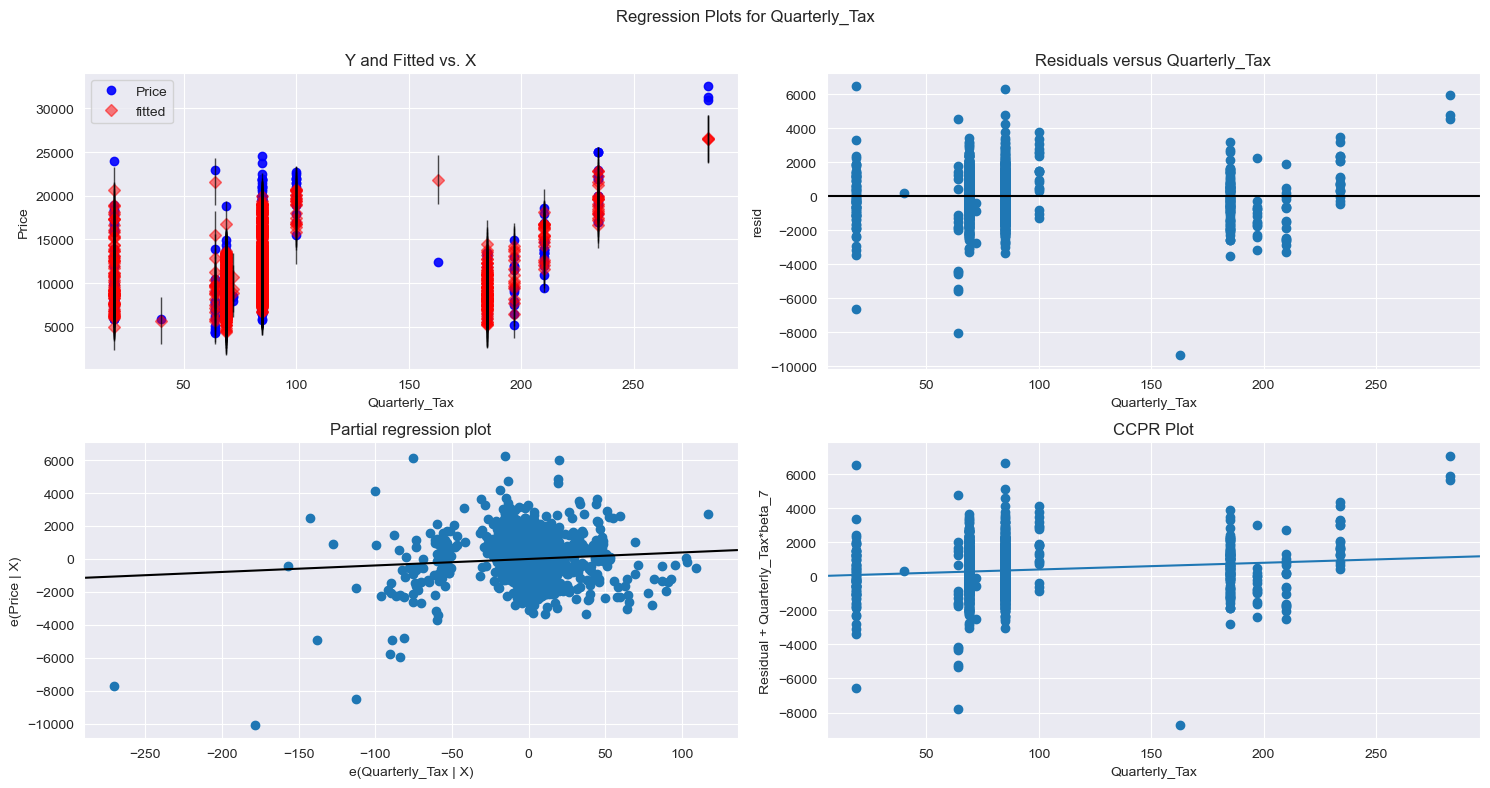

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig = fig)
plt.show()

eval_env: 1


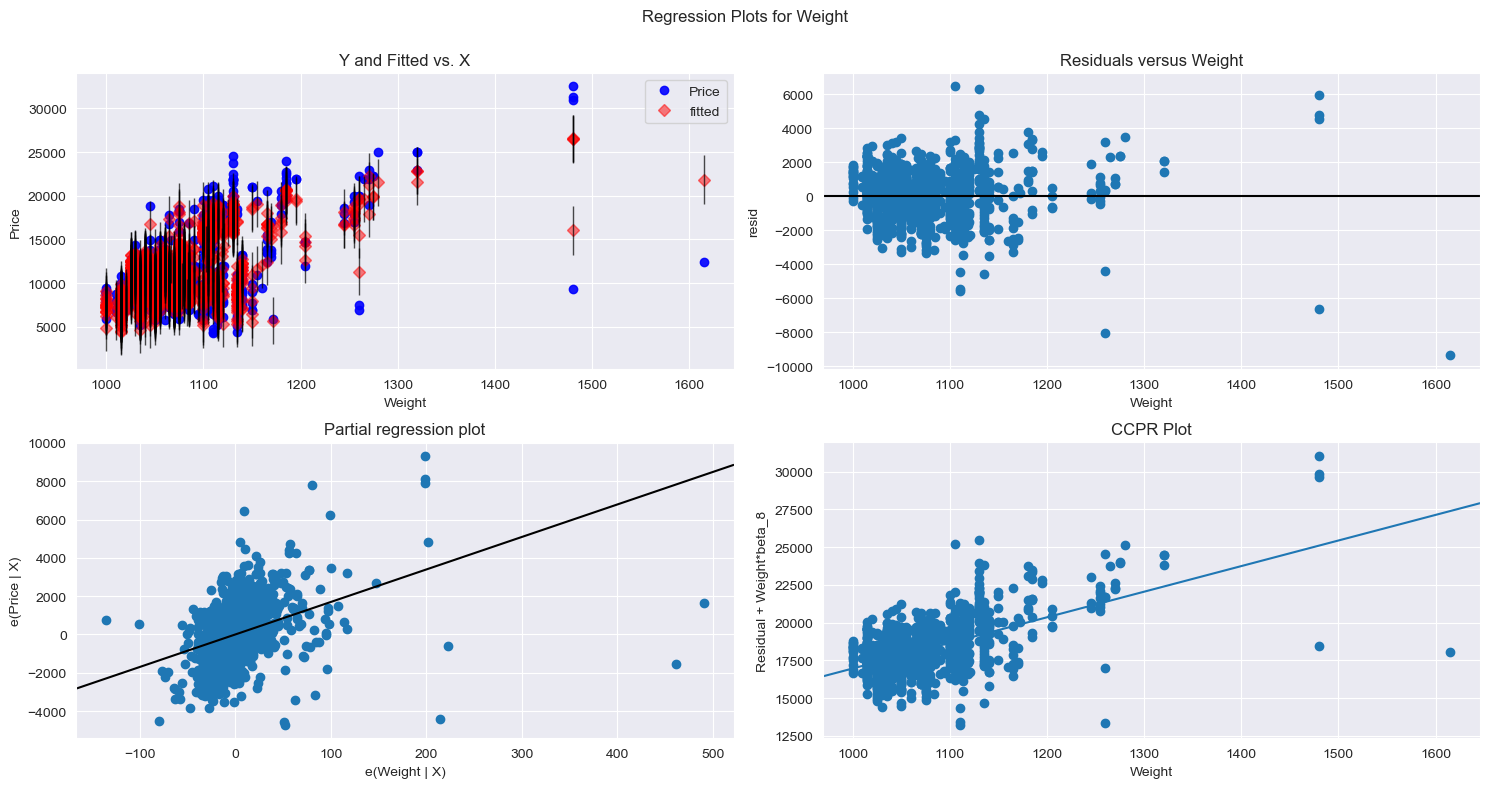

In [120]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'Weight', fig = fig)
plt.show()

####MODEL DELETION DIAGNOSTIC

###detecting influencers/outliers

Cook's Distance

In [121]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

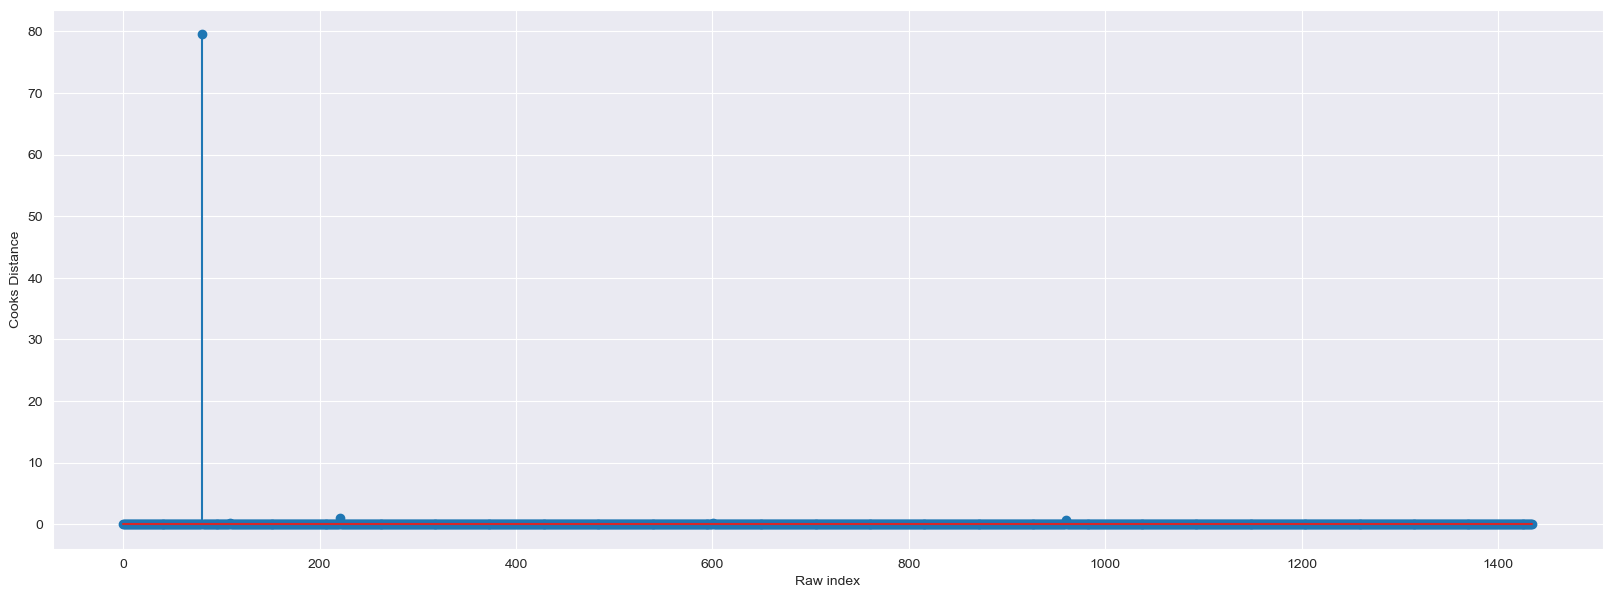

In [123]:
### plot the influencers values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(car)), np.round(c,3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [124]:
## index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624139909)

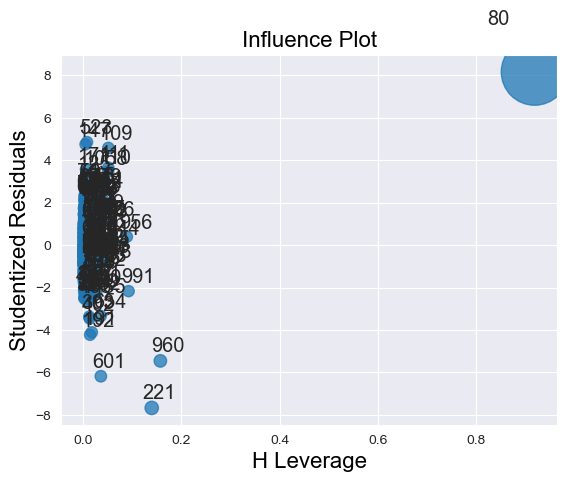

In [126]:
## High Influence POints 
influence_plot(model)
plt.show()

In [127]:
###here data point 80 is influencer

In [129]:
car[car.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [130]:
car.head(82)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
77,18450,27,23489,110,1600,5,5,85,1115
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,18950,25,20019,110,16000,5,5,100,1180


#### Improving the model

In [131]:
car1 = car.drop(car.index[[80]],axis=0).reset_index()
car1=car1.drop(["index"],axis = 1)
car1.head(83)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,17250,29,20000,110,1600,5,5,85,1115
81,15450,25,17003,97,1400,5,5,85,1110


In [132]:
model1 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = car1).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:23:37   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
model1_influence = model1.get_influence()
(c1, _) = model1_influence.cooks_distance

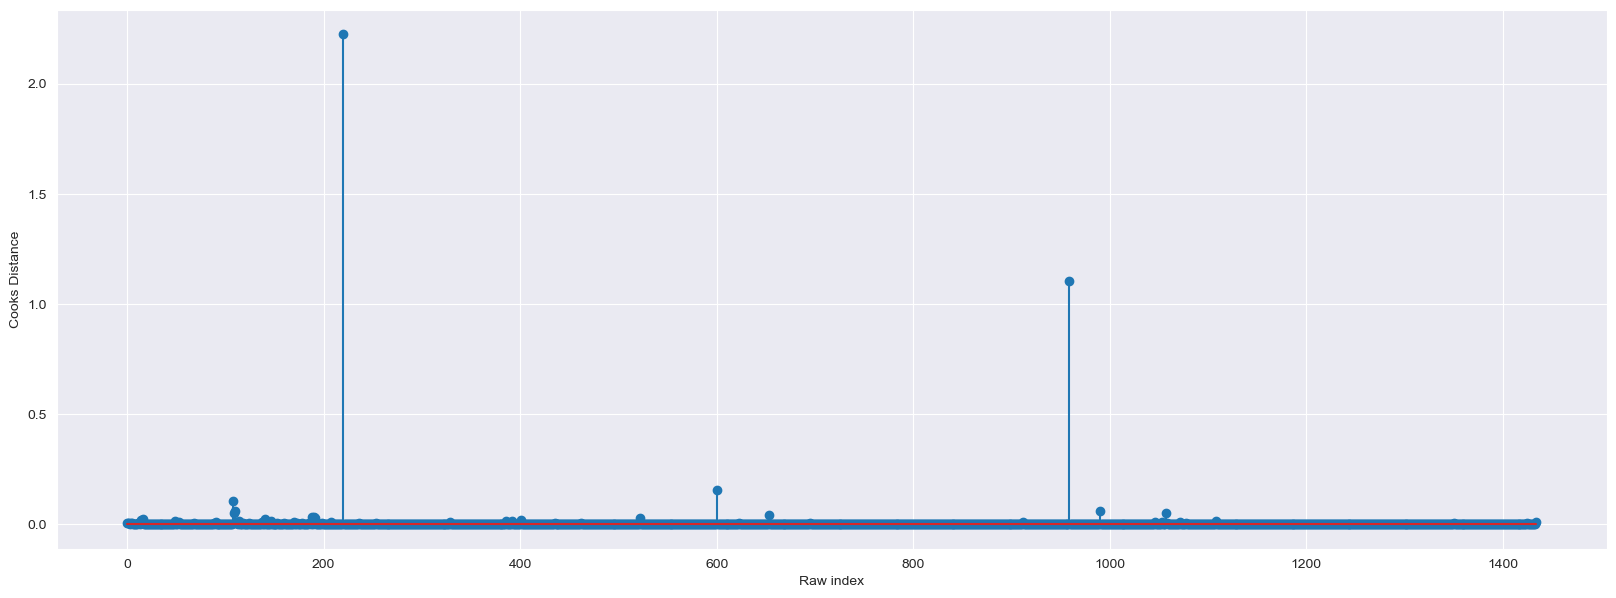

In [138]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)), np.round(c1,3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [140]:
#index and value of influencer where c is more than .5
(np.argmax(c1),np.max(c1))


(220, 2.2244611713005633)

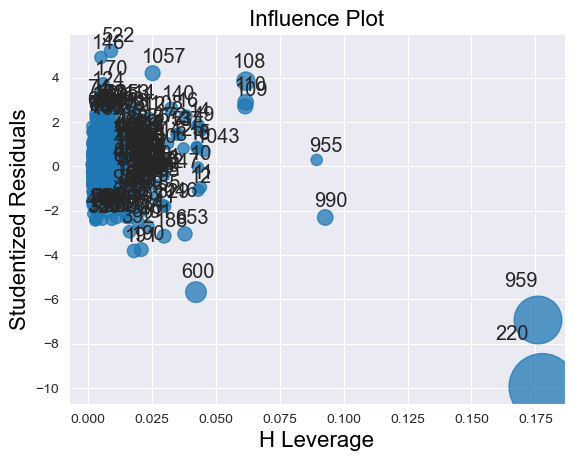

In [141]:
influence_plot(model1)
plt.show()


In [142]:
car1.head(962)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
957,8950,65,51000,86,1300,3,5,69,1015
958,8895,61,50925,110,1600,5,5,85,1070
959,9390,66,50806,86,1300,3,5,19,1480
960,8750,59,50469,110,1600,5,5,85,1070


In [143]:
cars=car1.drop(car1.index[[220,959]],axis=0).reset_index()
cars=cars.drop(['index'],axis=1)          #Drop the original index
cars


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [144]:
model2 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = cars).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:39:02   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
model2_influence = model2.get_influence()
(c2, _) = model2_influence.cooks_distance


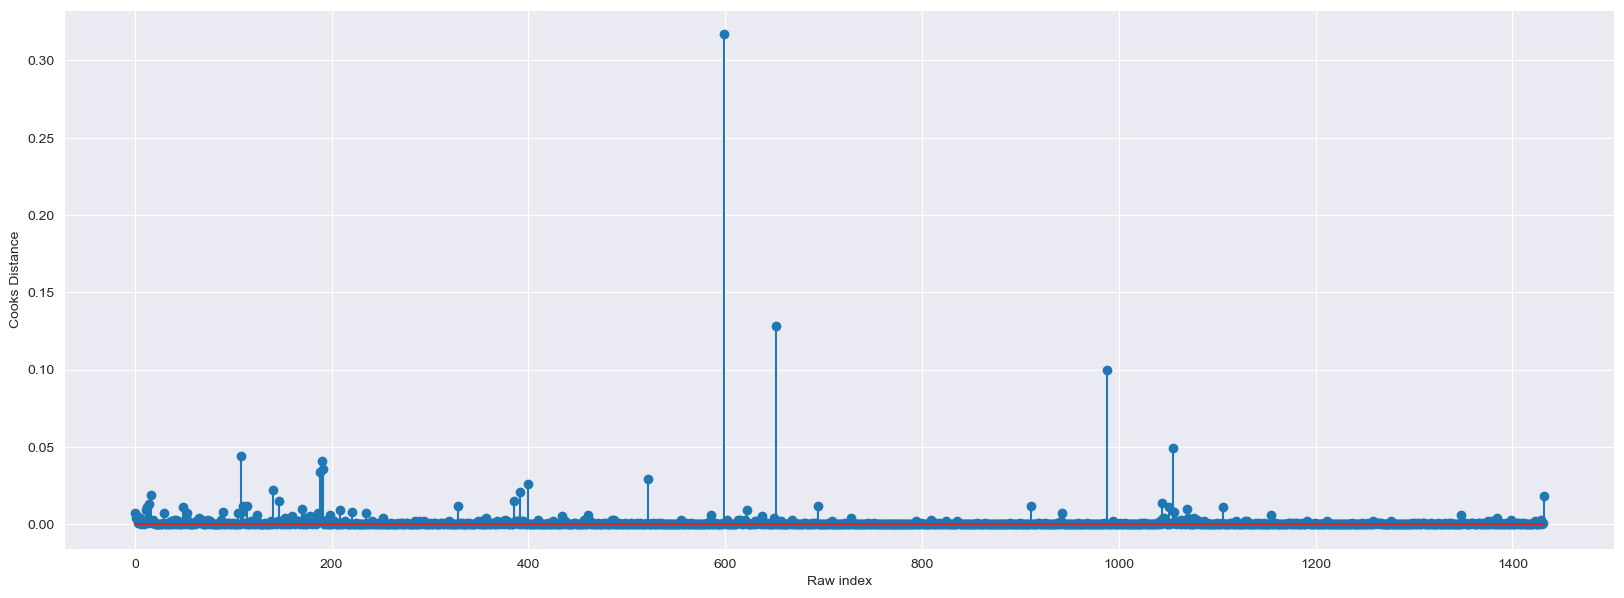

In [146]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c2, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()


In [147]:
#index and value of influencer where c is more than .5
(np.argmax(c2),np.max(c2))


(599, 0.3166131528144245)

##### since the value is <1,we can stop the diagnostic process and finalize the model

In [149]:
#Check the accuracy of the mode
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = cars).fit()


In [150]:
(final_model.rsquared,final_model.aic)

(0.8851845904421738, 24469.715205158594)

#### Predictiong for new data 

In [151]:
cars_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Quarterly_Tax":200,"Weight":1200 },index=[1]) 
final_model.predict(cars_new)


1    17947.972059
dtype: float64

In [152]:
final_model.predict()

array([16333.27381416, 15892.32685024, 16310.88608064, ...,
        8644.94730242,  8758.66446182, 10641.52100191])

In [153]:
cars['predicted'] = final_model.predict()

In [154]:
cars.predicted

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1428     9115.435074
1429     8499.218117
1430     8644.947302
1431     8758.664462
1432    10641.521002
Name: predicted, Length: 1433, dtype: float64

In [155]:
cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,predicted
0,13500,23,46986,90,2000,3,5,210,1165,16333.273814
1,13750,23,72937,90,2000,3,5,210,1165,15892.326850
2,13950,24,41711,90,2000,3,5,210,1165,16310.886081
3,14950,26,48000,90,2000,3,5,210,1165,15979.990390
4,13750,30,38500,90,2000,3,5,210,1170,15846.536733
...,...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025,9115.435074
1429,10845,72,19000,86,1300,3,5,69,1015,8499.218117
1430,8500,71,17016,86,1300,3,5,69,1015,8644.947302
1431,7250,70,16916,86,1300,3,5,69,1015,8758.664462


In [157]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:49:32   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
final_model.params

Intercept       -14743.311719
Age_08_04         -112.018007
KM                  -0.016992
HP                  36.608402
cc                  -3.795426
Doors             -122.543739
Gears              464.983862
Quarterly_Tax        5.213440
Weight              30.639784
dtype: float64

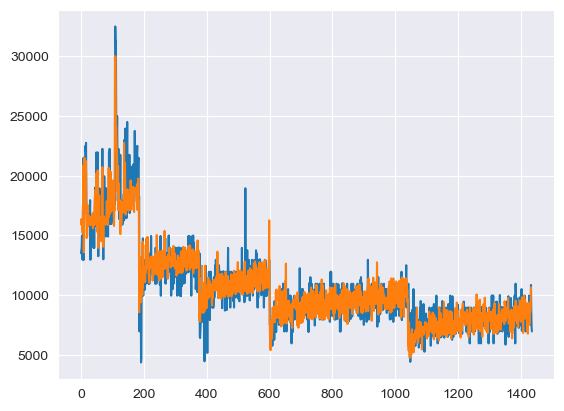

In [160]:
plt.plot(car.Price)
plt.plot(final_model.predict())
plt.show()